In [95]:
import sys
import pandas as pd; pd.set_option('display.max_columns', 500)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import random
import seaborn as sns; sns.set(style='ticks', color_codes = True)

from sklearn.preprocessing import PowerTransformer

# View the data

In [2]:
DATA_DIR = './data'

In [3]:
# head of general
general = pd.read_csv(DATA_DIR +'/' + 'OP_DTL_GNRL_PGYR2017_P01182019.csv',
                     nrows = 1000)
general.head(2)

,Change_Type,Covered_Recipient_Type,Teaching_Hospital_CCN,Teaching_Hospital_ID,Teaching_Hospital_Name,Physician_Profile_ID,Physician_First_Name,Physician_Middle_Name,Physician_Last_Name,Physician_Name_Suffix,Recipient_Primary_Business_Street_Address_Line1,Recipient_Primary_Business_Street_Address_Line2,Recipient_City,Recipient_State,Recipient_Zip_Code,Recipient_Country,Recipient_Province,Recipient_Postal_Code,Physician_Primary_Type,Physician_Specialty,Physician_License_State_code1,Physician_License_State_code2,Physician_License_State_code3,Physician_License_State_code4,Physician_License_State_code5,Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country,Total_Amount_of_Payment_USDollars,Date_of_Payment,Number_of_Payments_Included_in_Total_Amount,Form_of_Payment_or_Transfer_of_Value,Nature_of_Payment_or_Transfer_of_Value,City_of_Travel,State_of_Travel,Country_of_Travel,Physician_Ownership_Indicator,Third_Party_Payment_Recipient_Indicator,Name_of_Third_Party_Entity_Receiving_Payment_or_Transfer_of_Value,Charity_Indicator,Third_Party_Equals_Covered_Recipient_Indicator,Contextual_Information,Delay_in_Publication_Indicator,Record_ID,Dispute_Status_for_Publication,Related_Product_Indicator,Covered_or_Noncovered_Indicator_1,Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1,Product_Category_or_Therapeutic_Area_1,Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1,Associated_Drug_or_Biological_NDC_1,Covered_or_Noncovered_Indicator_2,Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_2,Product_Category_or_Therapeutic_Area_2,Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_2,Associated_Drug_or_Biological_NDC_2,Covered_or_Noncovered_Indicator_3,Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_3,Product_Category_or_Therapeutic_Area_3,Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_3,Associated_Drug_or_Biological_NDC_3,Covered_or_Noncovered_Indicator_4,Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_4,Product_Category_or_Therapeutic_Area_4,Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_4,Associated_Drug_or_Biological_NDC_4,Covered_or_Noncovered_Indicator_5,Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_5,Product_Category_or_Therapeutic_Area_5,Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_5,Associated_Drug_or_Biological_NDC_5,Program_Year,Payment_Publication_Date
0,UNCHANGED,Covered Recipient Physician,NaN,NaN,NaN,326860,NAZEM,NaN,ABRAHAM,NaN,422 KINETIC DR,SUITE B,HUNTINGTON,WV,25701,United States,NaN,NaN,Medical Doctor,Allopathic & Osteopathic Physicians|General Pr...,WV,NaN,NaN,NaN,NaN,Mission Pharmacal Company,100000000186,Mission Pharmacal Company,TX,United States,12.0,11/24/2017,1,In-kind items and services,Food and Beverage,NaN,NaN,NaN,No,No Third Party Payment,NaN,NaN,NaN,NaN,No,421243947,No,Yes,Covered,Drug,Antibacterial (topical),Plexion,57883-402-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,01/18/2019
1,UNCHANGED,Covered Recipient Physician,NaN,NaN,NaN,604392,Charles,NaN,Pak,NaN,5323 Harry Hines Blvd,NaN,Dallas,TX,75390,United States,NaN,NaN,Medical Doctor,Allopathic & Osteopathic Physicians|Internal M...,TX,NaN,NaN,NaN,NaN,Mission Pharmacal Company,100000000186,Mission Pharmacal Company,TX,United States,300.0,12/15/2017,1,"Dividend, profit or other return on investment",Charitable Contribution,NaN,NaN,NaN,No,Entity,Charles Y C Pak Foundation,Yes,Yes,NaN,No,421243939,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,01/18/2019


In [4]:
general.columns

Index(['Change_Type', 'Covered_Recipient_Type', 'Teaching_Hospital_CCN',
       'Teaching_Hospital_ID', 'Teaching_Hospital_Name',
       'Physician_Profile_ID', 'Physician_First_Name', 'Physician_Middle_Name',
       'Physician_Last_Name', 'Physician_Name_Suffix',
       'Recipient_Primary_Business_Street_Address_Line1',
       'Recipient_Primary_Business_Street_Address_Line2', 'Recipient_City',
       'Recipient_State', 'Recipient_Zip_Code', 'Recipient_Country',
       'Recipient_Province', 'Recipient_Postal_Code', 'Physician_Primary_Type',
       'Physician_Specialty', 'Physician_License_State_code1',
       'Physician_License_State_code2', 'Physician_License_State_code3',
       'Physician_License_State_code4', 'Physician_License_State_code5',
       'Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name',
       'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID',
       'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name',
       'Applicable_Manufacturer_o

In [5]:
# head of owner
owner = pd.read_csv(DATA_DIR +'/' + 'OP_DTL_OWNRSHP_PGYR2017_P01182019.csv',
                     nrows = 5)
owner.head(2)

,Change_Type,Physician_Profile_ID,Physician_First_Name,Physician_Middle_Name,Physician_Last_Name,Physician_Name_Suffix,Recipient_Primary_Business_Street_Address_Line1,Recipient_Primary_Business_Street_Address_Line2,Recipient_City,Recipient_State,Recipient_Zip_Code,Recipient_Country,Recipient_Province,Recipient_Postal_Code,Physician_Primary_Type,Physician_Specialty,Record_ID,Program_Year,Total_Amount_Invested_USDollars,Value_of_Interest,Terms_of_Interest,Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country,Dispute_Status_for_Publication,Interest_Held_by_Physician_or_an_Immediate_Family_Member,Payment_Publication_Date
0,NEW,261003,Margaret,R,Coffey,NaN,1 Bradley Rd,Suite 503,Woodbridge,CT,6525,United States,NaN,NaN,Medical Doctor,Allopathic & Osteopathic Physicians|Psychiatry...,485952405,2017,337153.06,1240585.28,Stock - Reflects the ownership interest of one...,"SI-BONE, Inc.",100000011102,"SI-BONE, Inc.",CA,United States,No,Immediate family member,01/18/2019
1,UNCHANGED,80522,HUSAM,H,BALKHY,NaN,9200 WISCONSIN AVE,NaN,MILWAUKEE,WI,53226,United States,NaN,NaN,Medical Doctor,Allopathic & Osteopathic Physicians|Thoracic S...,422181441,2017,0.00,18675.00,"18,750 Vested Shares on 9/30/2018 @ $ 0.996",Bovie Medical Corporation,100000046274,Bovie Medical Corporation,FL,United States,No,Physician Covered Recipient,01/18/2019


In [14]:
# head of research
research = pd.read_csv(DATA_DIR +'/' + 'OP_DTL_RSRCH_PGYR2017_P01182019.csv')
research.head(2)

,Change_Type,Covered_Recipient_Type,Noncovered_Recipient_Entity_Name,Teaching_Hospital_CCN,Teaching_Hospital_ID,Teaching_Hospital_Name,Physician_Profile_ID,Physician_First_Name,Physician_Middle_Name,Physician_Last_Name,Physician_Name_Suffix,Recipient_Primary_Business_Street_Address_Line1,Recipient_Primary_Business_Street_Address_Line2,Recipient_City,Recipient_State,Recipient_Zip_Code,Recipient_Country,Recipient_Province,Recipient_Postal_Code,Physician_Primary_Type,Physician_Specialty,Physician_License_State_code1,Physician_License_State_code2,Physician_License_State_code3,Physician_License_State_code4,Physician_License_State_code5,Principal_Investigator_1_Profile_ID,Principal_Investigator_1_First_Name,Principal_Investigator_1_Middle_Name,Principal_Investigator_1_Last_Name,Principal_Investigator_1_Name_Suffix,Principal_Investigator_1_Business_Street_Address_Line1,Principal_Investigator_1_Business_Street_Address_Line2,Principal_Investigator_1_City,Principal_Investigator_1_State,Principal_Investigator_1_Zip_Code,Principal_Investigator_1_Country,Principal_Investigator_1_Province,Principal_Investigator_1_Postal_Code,Principal_Investigator_1_Primary_Type,Principal_Investigator_1_Specialty,Principal_Investigator_1_License_State_code1,Principal_Investigator_1_License_State_code2,Principal_Investigator_1_License_State_code3,Principal_Investigator_1_License_State_code4,Principal_Investigator_1_License_State_code5,Principal_Investigator_2_Profile_ID,Principal_Investigator_2_First_Name,Principal_Investigator_2_Middle_Name,Principal_Investigator_2_Last_Name,Principal_Investigator_2_Name_Suffix,Principal_Investigator_2_Business_Street_Address_Line1,Principal_Investigator_2_Business_Street_Address_Line2,Principal_Investigator_2_City,Principal_Investigator_2_State,Principal_Investigator_2_Zip_Code,Principal_Investigator_2_Country,Principal_Investigator_2_Province,Principal_Investigator_2_Postal_Code,Principal_Investigator_2_Primary_Type,Principal_Investigator_2_Specialty,Principal_Investigator_2_License_State_code1,Principal_Investigator_2_License_State_code2,Principal_Investigator_2_License_State_code3,Principal_Investigator_2_License_State_code4,Principal_Investigator_2_License_State_code5,Principal_Investigator_3_Profile_ID,Principal_Investigator_3_First_Name,Principal_Investigator_3_Middle_Name,Principal_Investigator_3_Last_Name,Principal_Investigator_3_Name_Suffix,Principal_Investigator_3_Business_Street_Address_Line1,Principal_Investigator_3_Business_Street_Address_Line2,Principal_Investigator_3_City,Principal_Investigator_3_State,Principal_Investigator_3_Zip_Code,Principal_Investigator_3_Country,Principal_Investigator_3_Province,Principal_Investigator_3_Postal_Code,Principal_Investigator_3_Primary_Type,Principal_Investigator_3_Specialty,Principal_Investigator_3_License_State_code1,Principal_Investigator_3_License_State_code2,Principal_Investigator_3_License_State_code3,Principal_Investigator_3_License_State_code4,Principal_Investigator_3_License_State_code5,Principal_Investigator_4_Profile_ID,Principal_Investigator_4_First_Name,Principal_Investigator_4_Middle_Name,Principal_Investigator_4_Last_Name,Principal_Investigator_4_Name_Suffix,Principal_Investigator_4_Business_Street_Address_Line1,Principal_Investigator_4_Business_Street_Address_Line2,Principal_Investigator_4_City,Principal_Investigator_4_State,Principal_Investigator_4_Zip_Code,Principal_Investigator_4_Country,Principal_Investigator_4_Province,Principal_Investigator_4_Postal_Code,Principal_Investigator_4_Primary_Type,Principal_Investigator_4_Specialty,Principal_Investigator_4_License_State_code1,Principal_Investigator_4_License_State_code2,Principal_Investigator_4_License_State_code3,Principal_Investigator_4_License_State_code4,Principal_Investigator_4_License_State_code5,Principal_Investigator_5_Profile_ID,Principal_Investigator_5_First_Name,Principal_Investigator_5_Middle_Name,Principal_Investigator_5_Last_Name,Principal_Investigator_5_Name_Suffix,Principal_Investigator_5_Bus

In [7]:
research.columns.tolist()

['Change_Type',
 'Covered_Recipient_Type',
 'Noncovered_Recipient_Entity_Name',
 'Teaching_Hospital_CCN',
 'Teaching_Hospital_ID',
 'Teaching_Hospital_Name',
 'Physician_Profile_ID',
 'Physician_First_Name',
 'Physician_Middle_Name',
 'Physician_Last_Name',
 'Physician_Name_Suffix',
 'Recipient_Primary_Business_Street_Address_Line1',
 'Recipient_Primary_Business_Street_Address_Line2',
 'Recipient_City',
 'Recipient_State',
 'Recipient_Zip_Code',
 'Recipient_Country',
 'Recipient_Province',
 'Recipient_Postal_Code',
 'Physician_Primary_Type',
 'Physician_Specialty',
 'Physician_License_State_code1',
 'Physician_License_State_code2',
 'Physician_License_State_code3',
 'Physician_License_State_code4',
 'Physician_License_State_code5',
 'Principal_Investigator_1_Profile_ID',
 'Principal_Investigator_1_First_Name',
 'Principal_Investigator_1_Middle_Name',
 'Principal_Investigator_1_Last_Name',
 'Principal_Investigator_1_Name_Suffix',
 'Principal_Investigator_1_Business_Street_Address_Line1'

In [8]:
# head of removed
removed = pd.read_csv(DATA_DIR +'/' + 'OP_REMOVED_DELETED_PGYR2017_P01182019.csv',
                     nrows = 5)
removed.head(2)

,Change_Type,Program_Year,Payment_Type,Record_ID
0,DELETED,2017,General,422182879
1,DELETED,2017,General,423130609


In [13]:
# the overlap column between general and research class
column_overlap = [val for val in research.columns if val in general.columns]
print('The column overlap between 2 classes')
column_overlap

The column overlap between 2 classes


['Change_Type',
 'Covered_Recipient_Type',
 'Teaching_Hospital_CCN',
 'Teaching_Hospital_ID',
 'Teaching_Hospital_Name',
 'Physician_Profile_ID',
 'Physician_First_Name',
 'Physician_Middle_Name',
 'Physician_Last_Name',
 'Physician_Name_Suffix',
 'Recipient_Primary_Business_Street_Address_Line1',
 'Recipient_Primary_Business_Street_Address_Line2',
 'Recipient_City',
 'Recipient_State',
 'Recipient_Zip_Code',
 'Recipient_Country',
 'Recipient_Province',
 'Recipient_Postal_Code',
 'Physician_Primary_Type',
 'Physician_Specialty',
 'Physician_License_State_code1',
 'Physician_License_State_code2',
 'Physician_License_State_code3',
 'Physician_License_State_code4',
 'Physician_License_State_code5',
 'Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name',
 'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID',
 'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name',
 'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State',
 'Applicable_Manufacturer_or_Applica

- Some file/columne we can quite confidently IGNORE before the feature engnieering:
    - Change_Type
    - The ownership file. This file is too small while inccur some processing problem like the dupulicate of primary key.
    - The columns that only shows up in the research class, which leaks the target information.
    - The identity info.
     - name/id info. because it leaks target info.
     - location info of the physian/recipient. While the state info. is keeped at this stage.
     - License info. Because we has keeped the state info, which is related to the license state info. (for the high possibility the physian stays at the same state for working), and has more direct relation to the target.
    - date/publication related
- After that, we are going to further select the feature

# Further seletion
After the deletation, the features we keep in last section are:
- Covered_Recipient_Type
- Recipient_State (delete the data which is NOT is US)
- Physician_Primary_Type
- Physician_Specialty
- Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State (delete the data which is NOT is US))
- Total_Amount_of_Payment_USDollars
- Related_Product_Indicator
- Form_of_Payment_or_Transfer_of_Value
- Covered_or_Noncovered_Indicator_1 (indicator_2~5 are deleted as most of them are NAN)
- Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1
- Product_Category_or_Therapeutic_Area_1
- Form_of_Payment_or_Transfer_of_Value

#### validation: the most of the elment in indicator_2~5 in NAN

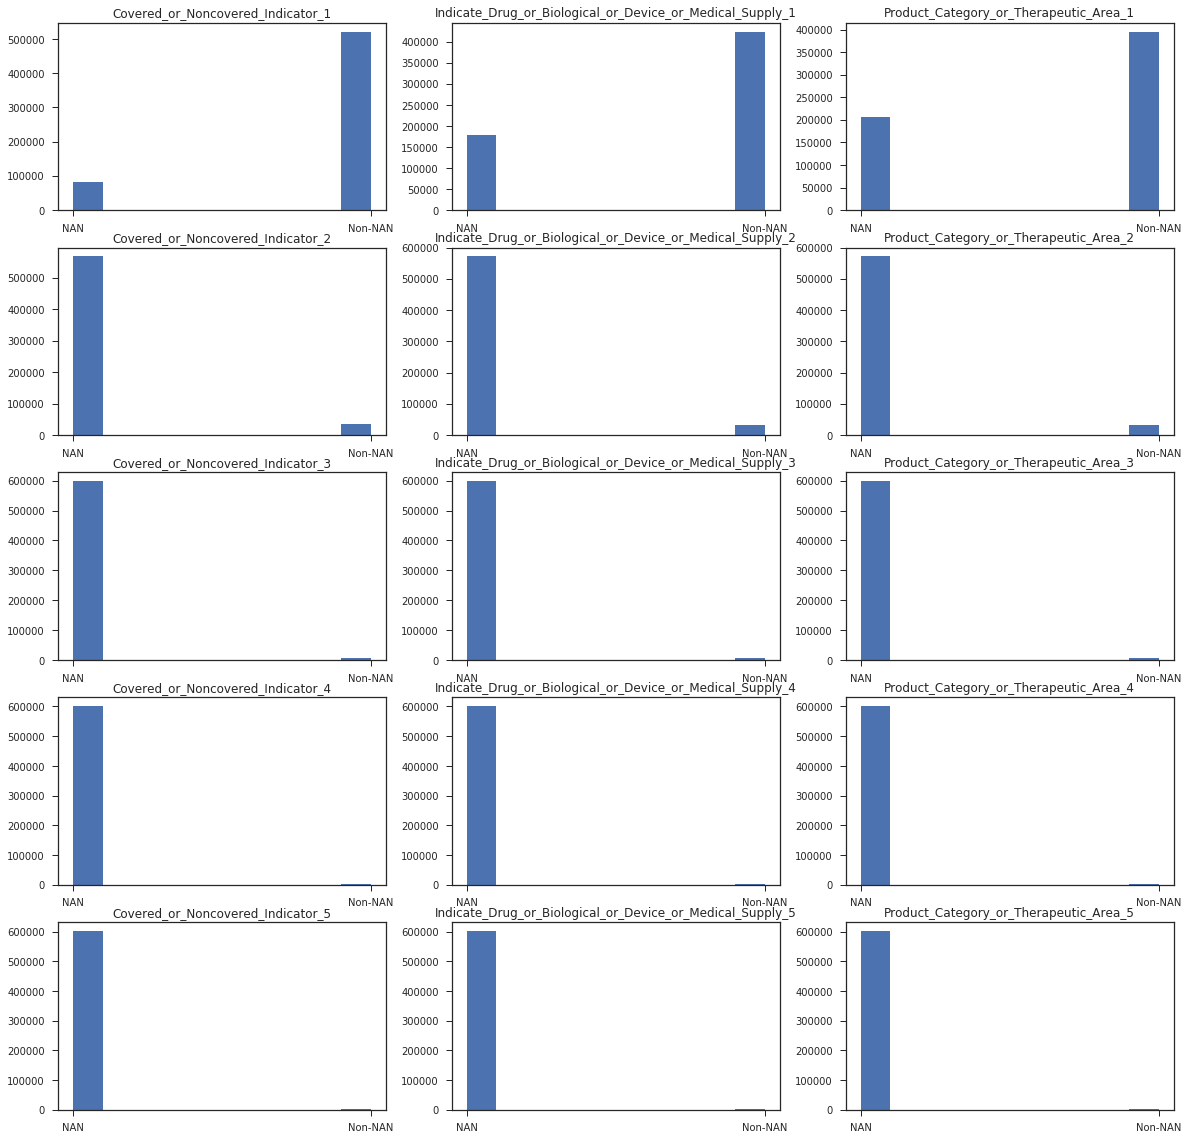

In [15]:
# construct column list
column_list = ['Covered_or_Noncovered_Indicator_',\
              'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_',\
              'Product_Category_or_Therapeutic_Area_']
column_list = [x + str(i) for i in range(1,6) for x in column_list ]

# plot the hist of the NAN and Non-NAN
fig, ax = plt.subplots(nrows=5, ncols = 3, figsize = (20, 20))
for row in ax:
    for col in row:
        col_name = column_list.pop(0)
        df = research[[col_name]]
        df.loc[~df[col_name].isnull(), col_name] = 'Non-NAN'
        df.loc[df[col_name].isnull(), col_name] = 'NAN'
        col.hist(df[[col_name]])
        col.axes.set_title(col_name)



# Sample and view feature-target corelation
- Considering the imbalanced data, we random select 50k entries from both classes
- view the inter-correlation between feature and the feature-target correlation

#### sample the data and preprocess

In [11]:
# total number of each file
filename_gen = 'OP_DTL_GNRL_PGYR2017_P01182019.csv'
n_gen = sum(1 for line in open(DATA_DIR+'/'+filename_gen)) - 1
print('{} lines in general class'.format(n_gen))

filename_res = 'OP_DTL_RSRCH_PGYR2017_P01182019.csv'
n_res = sum(1 for line in open(DATA_DIR+'/'+filename_res)) - 1
print('{} lines in research class'.format(n_res))

10663833 lines in general class
602530 lines in research class


In [16]:
# columns selected
colnames = ['Covered_Recipient_Type',\
           'Recipient_State',\
           'Physician_Primary_Type',\
           'Physician_Specialty',\
           'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State',\
           'Total_Amount_of_Payment_USDollars',\
           'Related_Product_Indicator',\
           'Form_of_Payment_or_Transfer_of_Value',\
           'Covered_or_Noncovered_Indicator_1',\
           'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1',\
           'Product_Category_or_Therapeutic_Area_1',\
           'Form_of_Payment_or_Transfer_of_Value']

# read the sample data
n_sample = 50000
skip = sorted(random.sample(range(1, n_gen+1), n_gen-n_sample))
general = pd.read_csv(DATA_DIR +'/' + filename_gen, 
                      skiprows=skip,
                     usecols = colnames)

skip = sorted(random.sample(range(1, n_res+1), n_res-n_sample))
research = pd.read_csv(DATA_DIR +'/' + filename_res, 
                       skiprows=skip,
                      usecols = colnames)

In [198]:
# add the target column, concat two class
general['target'] = 0
research['target'] = 1
XY = pd.concat([general, research])

#### Process the numerical feature

min of payment amount is 0.01
max of payment amount is 2186276.23


(array([73185.,  7786.,  3490.,  2510.,  1629.,  1235.,  1093.,   808.,
          598.,   591.]),
 array([1.000000e-02, 7.996650e+02, 1.599320e+03, 2.398975e+03,
        3.198630e+03, 3.998285e+03, 4.797940e+03, 5.597595e+03,
        6.397250e+03, 7.196905e+03, 7.996560e+03]),
 <a list of 10 Patch objects>)

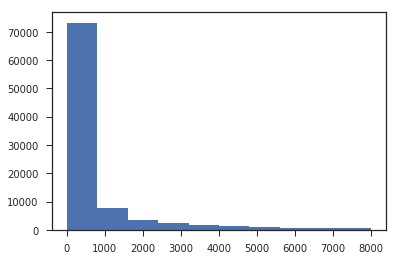

In [199]:
print("min of payment amount is {}".format(XY.Total_Amount_of_Payment_USDollars.min()))
print("max of payment amount is {}".format(XY.Total_Amount_of_Payment_USDollars.max()))

mask = XY.Total_Amount_of_Payment_USDollars < 8000 # only view [0, 8k] as the range is too wide
plt.hist(XY.loc[mask, 'Total_Amount_of_Payment_USDollars'])

A **power transform** is needed

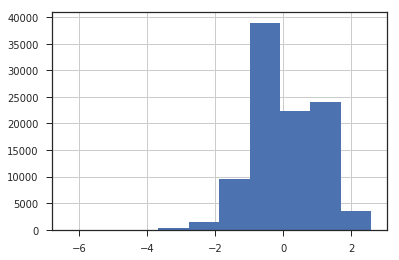

In [200]:
pt = PowerTransformer(method='box-cox')
pt.fit(XY.Total_Amount_of_Payment_USDollars.values.reshape(-1,1))
XY['Total_Amount_of_Payment_USDollars'] = \
    pt.transform(XY.Total_Amount_of_Payment_USDollars.values.reshape(-1,1))
XY.Total_Amount_of_Payment_USDollars.hist()

Much better

#### Handle the NAN

In [201]:
# Find the number of NAN in each column
# if the number is very small, we can impute it by the 'most' method
# if the ratio is of the sample level of th non-NAN, we should treat it as a new category
XY.isna().sum()/XY.shape[0]

Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State    0.05817
Covered_Recipient_Type                                            0.00000
Covered_or_Noncovered_Indicator_1                                 0.09097
Form_of_Payment_or_Transfer_of_Value                              0.00000
Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1         0.18096
Physician_Primary_Type                                            0.48132
Physician_Specialty                                               0.48207
Product_Category_or_Therapeutic_Area_1                            0.20604
Recipient_State                                                   0.00083
Related_Product_Indicator                                         0.00000
Total_Amount_of_Payment_USDollars                                 0.00000
target                                                            0.00000
dtype: float64

Thus the features in which the NAN should be considered as new feature:
- Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1 
- Physician_Primary_Type  
- Product_Category_or_Therapeutic_Area_1

The features in which the NAN should be imputed:
- Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State
- Covered_or_Noncovered_Indicator_1 

And these is no NAN in other columns

In [202]:
# impute the NAN (1/2)
# THE skelearn imputer will be used in later section
XY['Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State'] = \
    XY.Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State \
    .fillna(XY.Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State.mode().iloc[0])

XY['Covered_or_Noncovered_Indicator_1'] = \
    XY.Covered_or_Noncovered_Indicator_1 \
    .fillna(XY.Covered_or_Noncovered_Indicator_1.mode().iloc[0])
    
# impute the NAN (2/2)
XY = XY.fillna('NAN')
XY.head()

,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State,Covered_Recipient_Type,Covered_or_Noncovered_Indicator_1,Form_of_Payment_or_Transfer_of_Value,Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1,Physician_Primary_Type,Physician_Specialty,Product_Category_or_Therapeutic_Area_1,Recipient_State,Related_Product_Indicator,Total_Amount_of_Payment_USDollars,target
0,TX,Covered Recipient Physician,Covered,In-kind items and services,NAN,Medical Doctor,Allopathic & Osteopathic Physicians|General Pr...,NAN,IL,No,-0.666167,0
1,FL,Covered Recipient Physician,Covered,Cash or cash equivalent,NAN,Medical Doctor,Allopathic & Osteopathic Physicians|Plastic Su...,NAN,CA,No,-0.678110,0
2,FL,Covered Recipient Physician,Covered,Cash or cash equivalent,NAN,Medical Doctor,Allopathic & Osteopathic Physicians|Surgery,NAN,IL,No,-0.614350,0
3,FL,Covered Recipient Physician,Covered,Cash or cash equivalent,NAN,Doctor of Osteopathy,Allopathic & Osteopathic Physicians|Obstetrics...,NAN,MO,No,1.006608,0
4,FL,Covered Recipient Physician,Covered,Cash or cash equivalent,NAN,Medical Doctor,Allopathic & Osteopathic Physicians|Surgery,NAN,CA,No,-0.282411,0


#### encode the categorical feature

In [203]:
# encode the categorical feature for visualization
colnames = XY.columns.tolist()
cat_col = [colnames[i] for i in range(len(colnames)) if colnames[i] not in \
                             ['target', 'Total_Amount_of_Payment_USDollars']]

for col in cat_col:
    XY[col] = XY[col].astype('category').cat.codes


#### the feature-target correlation

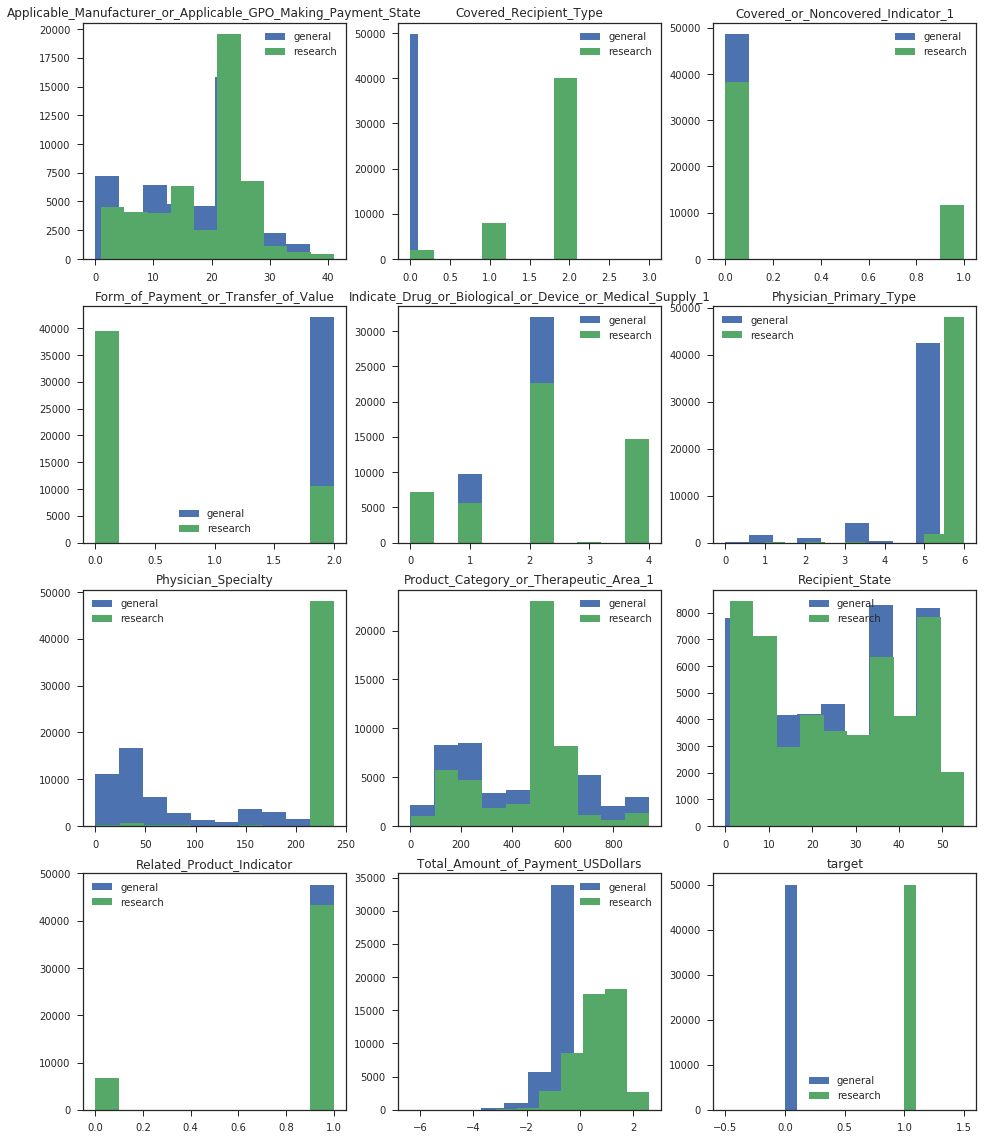

In [129]:
# plot the distribution of features for 2 class
fig, ax = plt.subplots(nrows=4, ncols = 3, figsize = (16, 20))
n_fig = 0
for row in ax:
    for col in row:
        gen = XY.loc[XY.target==0, colnames[n_fig]]
        res = XY.loc[XY.target==1, colnames[n_fig]]
        col.hist(gen)
        col.hist(res)
        col.axes.set_title(colnames[n_fig])
        col.axes.legend(['general','research'])
        n_fig += 1

- From the figure we can see that the **state-related faeture share the same distribution**, which accords with commen sense. We can exclude this kind of feature.
- We can see the difference in other features (of the extent of differing varies), and we want to keep them. We will further show which features are important later.

#### the inter-feature correlation
By the name of the feature, we can infer some possible related feature pairs:

In [204]:
cat_feature = ['Covered_Recipient_Type', 
                'Covered_or_Noncovered_Indicator_1',
                'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1',
                'Physician_Primary_Type',
                'Physician_Specialty',
                'Product_Category_or_Therapeutic_Area_1',
                'Related_Product_Indicator',
                'Form_of_Payment_or_Transfer_of_Value']

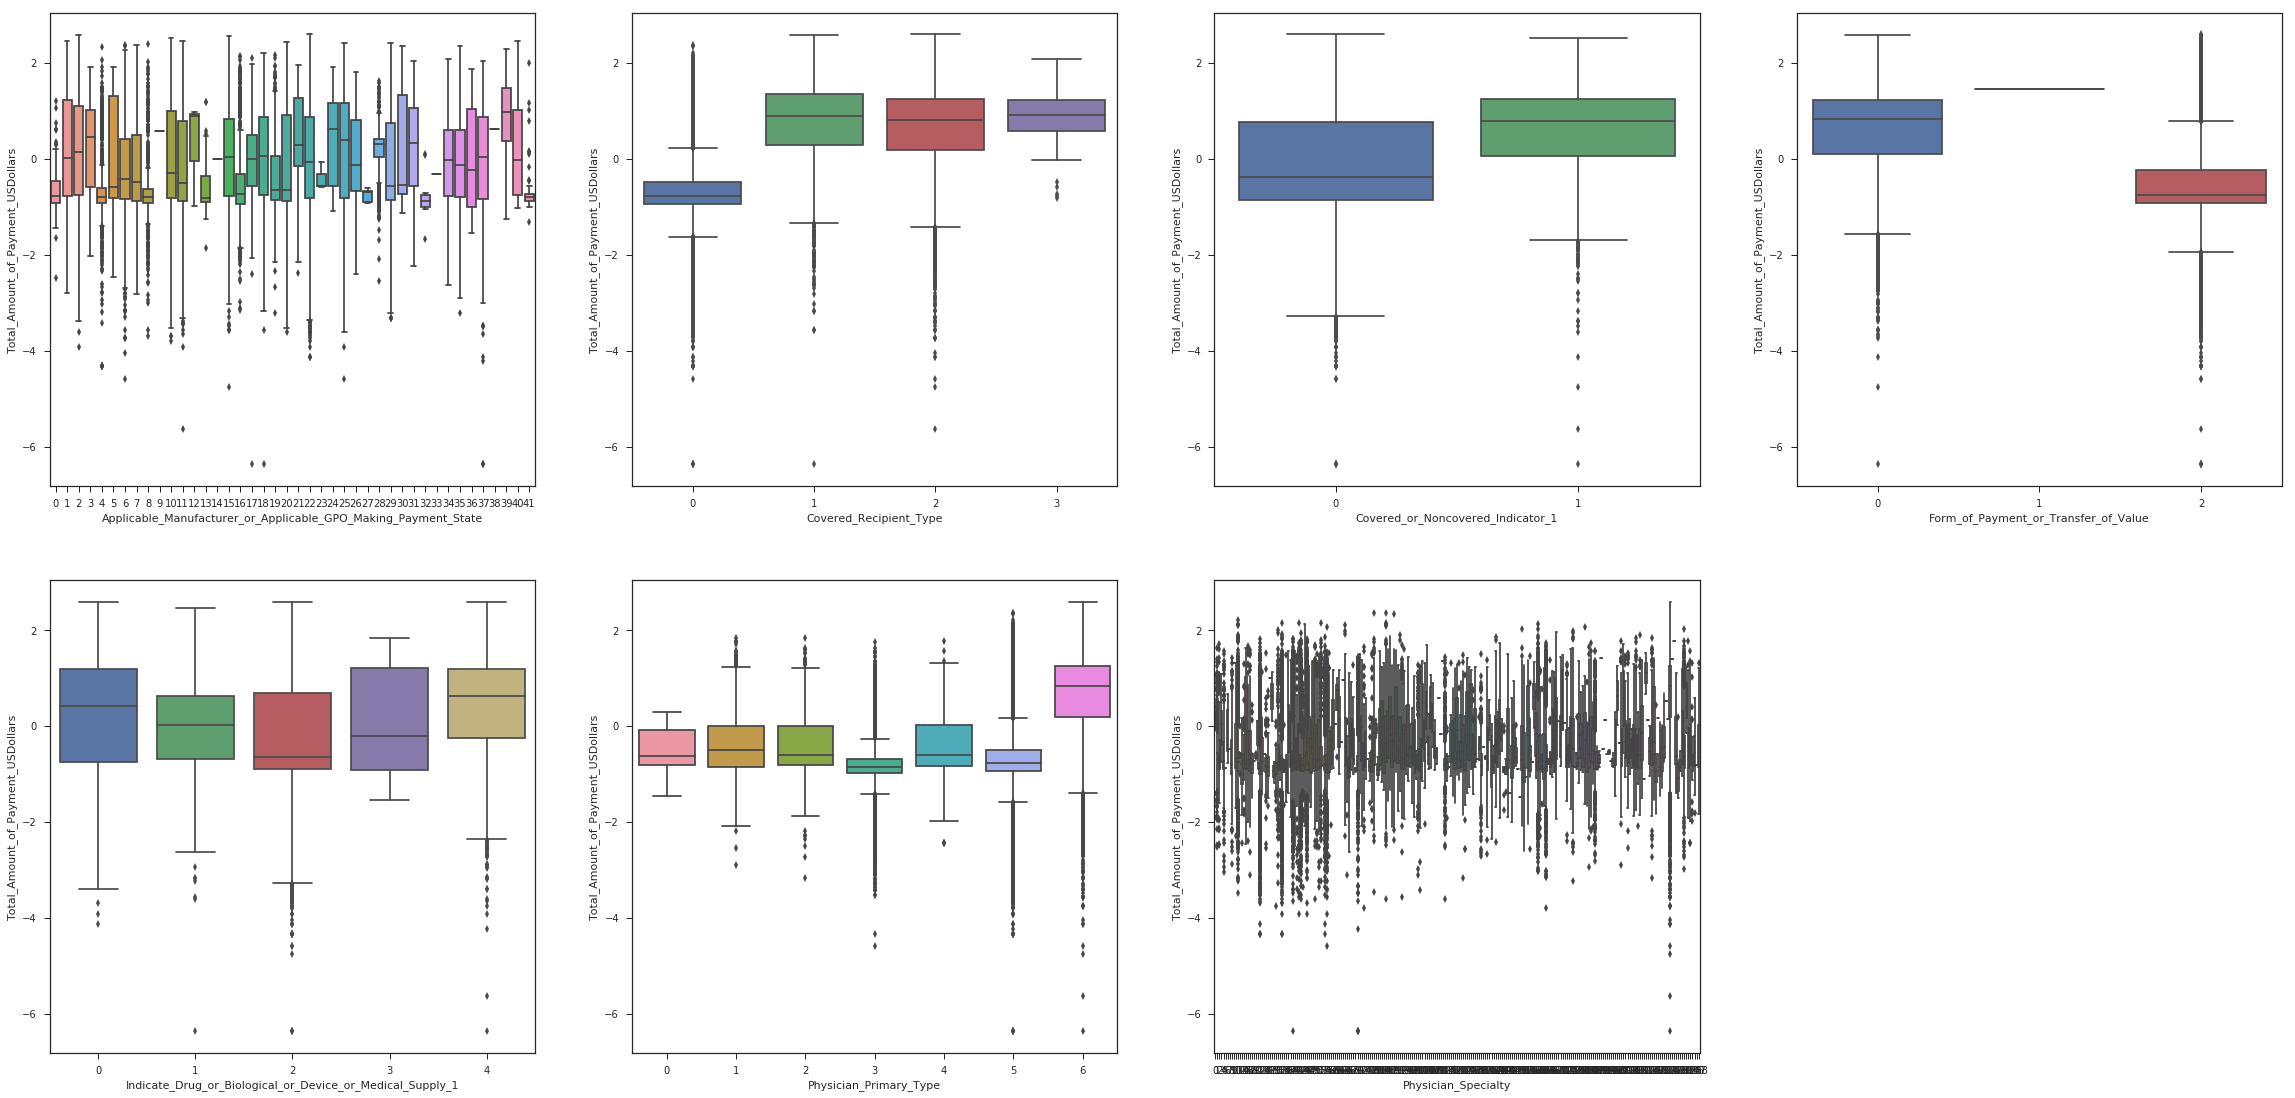

In [209]:
XY_cat = XY[cat_feature]
XY_cat = XY_cat.drop('Form_of_Payment_or_Transfer_of_Value', axis = 1)

# plot
n_cat = XY_cat.shape[1]
plt.figure(figsize=(40,40))
for i in range(n_cat):
    plt.subplot(4,4,i+1)
    ax = sns.boxplot(x=cat_col[i],
                 y="Total_Amount_of_Payment_USDollars",
                 data=XY) # only ONE element in this cate.

No strong correlation bwteen the categorical and the numerical feature

In [210]:
pd.crosstab(XY.Covered_or_Noncovered_Indicator_1, 
           XY.Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1)

Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1,0,1,2,3,4
Covered_or_Noncovered_Indicator_1,,,,,
0,11327,15012,51552,49,9097
1,717,290,2948,9,8999


In [33]:
# 2 correlation between the categorical data 
XY

,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State,Covered_Recipient_Type,Covered_or_Noncovered_Indicator_1,Form_of_Payment_or_Transfer_of_Value,Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1,Physician_Primary_Type,Physician_Specialty,Product_Category_or_Therapeutic_Area_1,Recipient_State,Related_Product_Indicator,Total_Amount_of_Payment_USDollars,target
0,36,0,1,2,4,5,31,525,16,0,19.90,0
1,7,0,1,0,4,5,138,525,5,0,19.42,0
2,7,0,1,0,4,5,176,525,16,0,22.14,0
3,7,0,1,0,4,3,70,525,26,0,1400.00,0
4,7,0,1,0,4,5,176,525,5,0,45.19,0
5,7,0,1,0,4,5,176,525,47,0,31.88,0
6,7,0,1,0,4,5,70,525,10,0,7.49,0
7,7,0,1,0,4,5,78,525,6,0,36.24,0
8,7,0,0,2,1,5,38,147,44,1,10.84,0
9,7,0,0,0,2,1,200,228,10,1,10.78,0
